In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
a=np.load('X_train.npy')
b=np.load('Y_train.npy')

In [3]:
from keras_preprocessing.image import ImageDataGenerator

In [4]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [5]:
import keras
from keras.applications.densenet import DenseNet121
from keras.layers import Input
from keras.models import Model
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [6]:
input_shape = (224, 224, 3)

In [7]:
num_of_class = 14

In [8]:
img_in = Input(input_shape)              #input of model 
model = DenseNet121(include_top= False , # remove  the  fully-connected layers at the top of the network
                weights='imagenet',      # pre train weight 
                input_tensor= img_in, 
                input_shape= input_shape,
                pooling ='avg') 

x = model.output  
predictions = Dense(num_of_class, activation="sigmoid", name="predictions")(x)    # fuly connected layer for predict class 
model = Model(inputs=img_in, outputs=predictions)

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

In [10]:
import keras.backend as K

In [11]:
adam = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

In [12]:
def unweighted_binary_crossentropy(y_true, y_pred):
    """
    Args:
        y_true: true labels
        y_pred: predicted labels

    Returns: the sum of binary cross entropy loss across all the classes

    """
    return K.sum(K.binary_crossentropy(y_true, y_pred))

In [13]:
model.compile(optimizer=adam, loss=unweighted_binary_crossentropy, metrics=['accuracy'])

In [14]:
model.fit_generator(datagen.flow(a,b, batch_size=32),
                    steps_per_epoch=100, epochs=800)

Instructions for updating:
Use tf.cast instead.
Epoch 1/800


/opt/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


100/100 [==============================] - 44s 440ms/step - loss: 169.6317 - acc: 0.2191
Epoch 2/800
100/100 [==============================] - 22s 218ms/step - loss: 155.6922 - acc: 0.2691
Epoch 3/800
100/100 [==============================] - 22s 217ms/step - loss: 149.8607 - acc: 0.2716
Epoch 4/800
100/100 [==============================] - 22s 222ms/step - loss: 140.5789 - acc: 0.2703
Epoch 5/800
100/100 [==============================] - 21s 215ms/step - loss: 137.2219 - acc: 0.3022
Epoch 6/800
100/100 [==============================] - 21s 210ms/step - loss: 136.2933 - acc: 0.3075
Epoch 7/800
100/100 [==============================] - 21s 209ms/step - loss: 136.6928 - acc: 0.2894
Epoch 8/800
100/100 [==============================] - 21s 209ms/step - loss: 136.8561 - acc: 0.2941
Epoch 9/800
100/100 [==============================] - 21s 208ms/step - loss: 135.0127 - acc: 0.2856
Epoch 10/800
100/100 [==============================] - 21s 209ms/step - loss: 132.8343 - acc: 0.3003
E

100/100 [==============================] - 22s 215ms/step - loss: 127.6171 - acc: 0.3172
Epoch 82/800
100/100 [==============================] - 22s 216ms/step - loss: 126.4352 - acc: 0.3341
Epoch 83/800
100/100 [==============================] - 22s 216ms/step - loss: 127.1984 - acc: 0.3309
Epoch 84/800
100/100 [==============================] - 21s 214ms/step - loss: 127.8566 - acc: 0.3312
Epoch 85/800
100/100 [==============================] - 21s 212ms/step - loss: 127.5701 - acc: 0.3322
Epoch 86/800
100/100 [==============================] - 21s 210ms/step - loss: 127.4736 - acc: 0.3181
Epoch 87/800
100/100 [==============================] - 21s 211ms/step - loss: 127.6636 - acc: 0.3184
Epoch 88/800
100/100 [==============================] - 22s 223ms/step - loss: 127.1147 - acc: 0.3369
Epoch 89/800
100/100 [==============================] - 21s 213ms/step - loss: 126.3089 - acc: 0.3219
Epoch 90/800
100/100 [==============================] - 21s 214ms/step - loss: 127.0335 - acc: 

100/100 [==============================] - 21s 210ms/step - loss: 122.9687 - acc: 0.3484
Epoch 161/800
100/100 [==============================] - 21s 213ms/step - loss: 121.1939 - acc: 0.3519
Epoch 162/800
100/100 [==============================] - 21s 210ms/step - loss: 121.6933 - acc: 0.3569
Epoch 163/800
100/100 [==============================] - 21s 209ms/step - loss: 122.6609 - acc: 0.3550
Epoch 164/800
100/100 [==============================] - 21s 210ms/step - loss: 122.0503 - acc: 0.3513
Epoch 165/800
100/100 [==============================] - 21s 210ms/step - loss: 121.6608 - acc: 0.3650
Epoch 166/800
100/100 [==============================] - 21s 211ms/step - loss: 121.0740 - acc: 0.3491
Epoch 167/800
100/100 [==============================] - 21s 214ms/step - loss: 122.1220 - acc: 0.3503
Epoch 168/800
100/100 [==============================] - 21s 210ms/step - loss: 121.9748 - acc: 0.3634
Epoch 169/800
100/100 [==============================] - 21s 210ms/step - loss: 119.797

100/100 [==============================] - 21s 213ms/step - loss: 122.5990 - acc: 0.3616
Epoch 240/800
100/100 [==============================] - 21s 211ms/step - loss: 118.8673 - acc: 0.3525
Epoch 241/800
100/100 [==============================] - 21s 214ms/step - loss: 118.8506 - acc: 0.3681
Epoch 242/800
100/100 [==============================] - 22s 216ms/step - loss: 120.3815 - acc: 0.3666
Epoch 243/800
100/100 [==============================] - 22s 215ms/step - loss: 119.8129 - acc: 0.3575
Epoch 244/800
100/100 [==============================] - 21s 213ms/step - loss: 118.9048 - acc: 0.3859
Epoch 245/800
100/100 [==============================] - 21s 214ms/step - loss: 116.7666 - acc: 0.3759
Epoch 246/800
100/100 [==============================] - 22s 219ms/step - loss: 118.0681 - acc: 0.3829
Epoch 247/800
100/100 [==============================] - 22s 217ms/step - loss: 119.5342 - acc: 0.3606
Epoch 248/800
100/100 [==============================] - 21s 214ms/step - loss: 117.538

100/100 [==============================] - 21s 209ms/step - loss: 118.2337 - acc: 0.3794
Epoch 319/800
100/100 [==============================] - 21s 207ms/step - loss: 117.2360 - acc: 0.3759
Epoch 320/800
100/100 [==============================] - 21s 208ms/step - loss: 117.9644 - acc: 0.3675
Epoch 321/800
100/100 [==============================] - 21s 212ms/step - loss: 114.9239 - acc: 0.3869
Epoch 322/800
100/100 [==============================] - 21s 211ms/step - loss: 115.4244 - acc: 0.3784
Epoch 323/800
100/100 [==============================] - 21s 208ms/step - loss: 116.7828 - acc: 0.3888
Epoch 324/800
100/100 [==============================] - 21s 208ms/step - loss: 115.9940 - acc: 0.3808
Epoch 325/800
100/100 [==============================] - 21s 209ms/step - loss: 117.5981 - acc: 0.3825
Epoch 326/800
100/100 [==============================] - 21s 209ms/step - loss: 117.1252 - acc: 0.3756
Epoch 327/800
100/100 [==============================] - 21s 208ms/step - loss: 117.311

100/100 [==============================] - 22s 215ms/step - loss: 116.0612 - acc: 0.3784
Epoch 398/800
100/100 [==============================] - 21s 212ms/step - loss: 116.6151 - acc: 0.3831
Epoch 399/800
100/100 [==============================] - 21s 210ms/step - loss: 115.2548 - acc: 0.3891
Epoch 400/800
100/100 [==============================] - 21s 210ms/step - loss: 113.6024 - acc: 0.3881
Epoch 401/800
100/100 [==============================] - 21s 211ms/step - loss: 117.5825 - acc: 0.3681
Epoch 402/800
100/100 [==============================] - 21s 214ms/step - loss: 115.4966 - acc: 0.3820
Epoch 403/800
100/100 [==============================] - 22s 218ms/step - loss: 113.2825 - acc: 0.4003
Epoch 404/800
100/100 [==============================] - 21s 213ms/step - loss: 115.2150 - acc: 0.3816
Epoch 405/800
100/100 [==============================] - 22s 218ms/step - loss: 115.9736 - acc: 0.3891
Epoch 406/800
100/100 [==============================] - 22s 216ms/step - loss: 116.203

100/100 [==============================] - 21s 208ms/step - loss: 115.0613 - acc: 0.3725
Epoch 477/800
100/100 [==============================] - 21s 208ms/step - loss: 115.0242 - acc: 0.3953
Epoch 478/800
100/100 [==============================] - 21s 208ms/step - loss: 112.1060 - acc: 0.3944
Epoch 479/800
100/100 [==============================] - 21s 209ms/step - loss: 114.3521 - acc: 0.3929
Epoch 480/800
100/100 [==============================] - 21s 208ms/step - loss: 113.9129 - acc: 0.3978
Epoch 481/800
100/100 [==============================] - 21s 208ms/step - loss: 113.0235 - acc: 0.3953
Epoch 482/800
100/100 [==============================] - 21s 209ms/step - loss: 113.4076 - acc: 0.4000
Epoch 483/800
100/100 [==============================] - 21s 207ms/step - loss: 113.8254 - acc: 0.3831
Epoch 484/800
100/100 [==============================] - 21s 208ms/step - loss: 113.8849 - acc: 0.4000
Epoch 485/800
100/100 [==============================] - 21s 208ms/step - loss: 112.774

100/100 [==============================] - 21s 213ms/step - loss: 113.5490 - acc: 0.3869
Epoch 556/800
100/100 [==============================] - 22s 217ms/step - loss: 112.4246 - acc: 0.4031
Epoch 557/800
100/100 [==============================] - 22s 217ms/step - loss: 111.0388 - acc: 0.3945
Epoch 558/800
100/100 [==============================] - 22s 222ms/step - loss: 113.2953 - acc: 0.3987
Epoch 559/800
100/100 [==============================] - 21s 211ms/step - loss: 113.1308 - acc: 0.3931
Epoch 560/800
100/100 [==============================] - 21s 214ms/step - loss: 111.2888 - acc: 0.4138
Epoch 561/800
100/100 [==============================] - 21s 211ms/step - loss: 111.9819 - acc: 0.3953
Epoch 562/800
100/100 [==============================] - 21s 209ms/step - loss: 112.5403 - acc: 0.4103
Epoch 563/800
100/100 [==============================] - 21s 210ms/step - loss: 114.7839 - acc: 0.3919
Epoch 564/800
100/100 [==============================] - 21s 214ms/step - loss: 111.384

100/100 [==============================] - 21s 209ms/step - loss: 114.8333 - acc: 0.3862
Epoch 635/800
100/100 [==============================] - 21s 210ms/step - loss: 111.9102 - acc: 0.3973
Epoch 636/800
100/100 [==============================] - 21s 210ms/step - loss: 113.2326 - acc: 0.3975
Epoch 637/800
100/100 [==============================] - 21s 210ms/step - loss: 110.4267 - acc: 0.4172
Epoch 638/800
100/100 [==============================] - 21s 209ms/step - loss: 113.1330 - acc: 0.4009
Epoch 639/800
100/100 [==============================] - 21s 209ms/step - loss: 110.0231 - acc: 0.4166
Epoch 640/800
100/100 [==============================] - 21s 210ms/step - loss: 112.0842 - acc: 0.4094
Epoch 641/800
100/100 [==============================] - 21s 209ms/step - loss: 111.0423 - acc: 0.3991
Epoch 642/800
100/100 [==============================] - 21s 210ms/step - loss: 110.4796 - acc: 0.4062
Epoch 643/800
100/100 [==============================] - 21s 210ms/step - loss: 111.646

100/100 [==============================] - 21s 208ms/step - loss: 110.1151 - acc: 0.4062
Epoch 714/800
100/100 [==============================] - 21s 208ms/step - loss: 111.2000 - acc: 0.4078
Epoch 715/800
100/100 [==============================] - 21s 208ms/step - loss: 111.6105 - acc: 0.4050
Epoch 716/800
100/100 [==============================] - 21s 208ms/step - loss: 112.6711 - acc: 0.4028
Epoch 717/800
100/100 [==============================] - 21s 207ms/step - loss: 109.9261 - acc: 0.4062
Epoch 718/800
100/100 [==============================] - 21s 208ms/step - loss: 110.0674 - acc: 0.4153
Epoch 719/800
100/100 [==============================] - 21s 208ms/step - loss: 110.8742 - acc: 0.4059
Epoch 720/800
100/100 [==============================] - 22s 215ms/step - loss: 111.7275 - acc: 0.4069
Epoch 721/800
100/100 [==============================] - 21s 211ms/step - loss: 112.0812 - acc: 0.3969
Epoch 722/800
100/100 [==============================] - 21s 207ms/step - loss: 110.758

100/100 [==============================] - 21s 208ms/step - loss: 107.0852 - acc: 0.4184
Epoch 793/800
100/100 [==============================] - 21s 209ms/step - loss: 110.0627 - acc: 0.3969
Epoch 794/800
100/100 [==============================] - 21s 209ms/step - loss: 110.7562 - acc: 0.4022
Epoch 795/800
100/100 [==============================] - 21s 209ms/step - loss: 111.2627 - acc: 0.4097
Epoch 796/800
100/100 [==============================] - 21s 209ms/step - loss: 111.6838 - acc: 0.4113
Epoch 797/800
100/100 [==============================] - 21s 212ms/step - loss: 109.8347 - acc: 0.4109
Epoch 798/800
100/100 [==============================] - 21s 213ms/step - loss: 110.8420 - acc: 0.4072
Epoch 799/800
100/100 [==============================] - 21s 213ms/step - loss: 109.0262 - acc: 0.4191
Epoch 800/800
100/100 [==============================] - 21s 214ms/step - loss: 109.9609 - acc: 0.4103


In [15]:
all_labels = ['Atelectasis', 'Consolidation', 'Infiltration', 'Pneumothorax', 'Edema', 'Emphysema', 'Fibrosis', 'Effusion', 'Pneumonia', 'Pleural_Thickening', 
'Cardiomegaly', 'Nodule', 'Mass', 'Hernia',]

In [16]:
c=np.load('X_test.npy')

In [17]:
d=np.load('Y_test.npy')

In [18]:
pred_Y = model.predict(c, batch_size = 32, verbose = True)

10352/10352 [==============================] - 23s 2ms/step


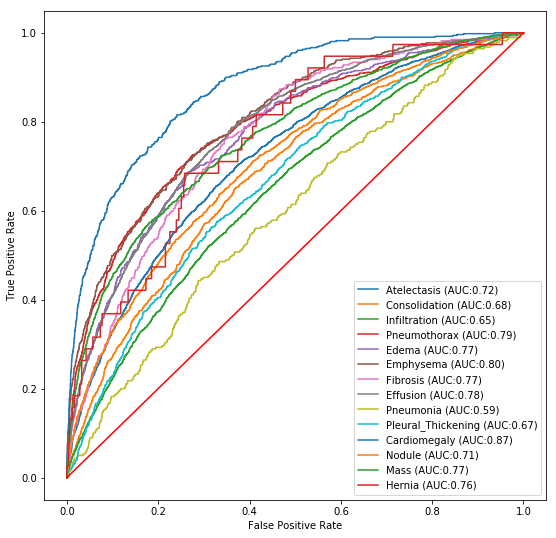

In [19]:
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(all_labels):
    fpr, tpr, thresholds = roc_curve(d[:,idx].astype(int), pred_Y[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
x = np.linspace(0,1,100)
y=x
c_ax.plot(x,y,'-r')
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('DENSEold 800.png')

In [20]:
id=[1,11,2,5,8,6,7,14,3,13,12,10,9,4]

In [6]:
q=np.load('Predictions.npy')

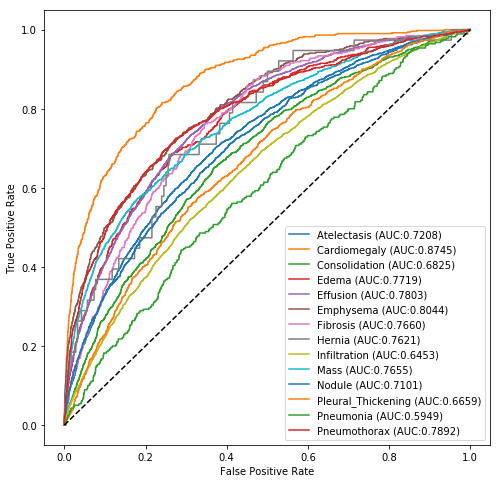

In [21]:
fig1, c_ax1 = plt.subplots(1,1, figsize = (8, 8))
for i in range(14):
    k=id[i]
    c_label=all_labels[k-1]
    fpr, tpr, thresholds = roc_curve(d[:,k-1].astype(int), pred_Y[:,k-1])
    c_ax1.plot(fpr, tpr, label = '%s (AUC:%0.4f)'  % (c_label, auc(fpr, tpr)))
x = np.linspace(0,1,100)
y=x
c_ax1.plot(x,y,'--k')
c_ax1.legend()
c_ax1.set_xlabel('False Positive Rate')
c_ax1.set_ylabel('True Positive Rate')
fig1.savefig('DENSEold 8001.png')

In [36]:
j=0
for label in all_labels:
    s=0

    for i in range(41407):
        if(b[i][j]==1):
            s=s+1
    print("%s : %5d"%(label,s))
    j+=1
    
    

Atelectasis :  9239
Consolidation :  3726
Infiltration : 15895
Pneumothorax :  4244
Edema :  1809
Emphysema :  2027
Fibrosis :  1354
Effusion : 10646
Pneumonia :  1151
Pleural_Thickening :  2683
Cardiomegaly :  2266
Nodule :  5124
Mass :  4581
Hernia :   189


In [31]:
a.shape

(41407, 224, 224, 3)

In [37]:
j=0
for label in all_labels:
    s=0

    for i in range(10352):
        if(d[i][j]==1):
            s=s+1
    print("%s : %5d"%(label,s))
    j+=1
    

Atelectasis :  2320
Consolidation :   941
Infiltration :  3999
Pneumothorax :  1058
Edema :   494
Emphysema :   489
Fibrosis :   332
Effusion :  2671
Pneumonia :   280
Pleural_Thickening :   702
Cardiomegaly :   510
Nodule :  1207
Mass :  1201
Hernia :    38


In [38]:
pred_Y

array([[3.32223773e-02, 1.57029688e-01, 4.80267704e-01, ...,
        2.05025375e-02, 3.44476998e-02, 4.05013561e-05],
       [9.45130885e-02, 4.80121076e-02, 5.66155136e-01, ...,
        1.24664515e-01, 3.08442116e-02, 7.41639733e-03],
       [2.99732983e-02, 2.85172164e-02, 5.38798332e-01, ...,
        1.98304832e-01, 4.41916585e-02, 3.69310379e-03],
       ...,
       [3.56460750e-01, 1.60032362e-01, 4.79491591e-01, ...,
        5.69956601e-02, 8.09014440e-02, 1.61328614e-02],
       [2.47651190e-01, 1.11799508e-01, 3.24926198e-01, ...,
        1.85551941e-02, 1.41535103e-02, 1.55001879e-04],
       [8.35439265e-02, 4.63199914e-02, 4.71906096e-01, ...,
        1.51913941e-01, 5.16614914e-02, 3.49256396e-03]], dtype=float32)

In [40]:
d1=0
for i in range(10352):
    for j in range(14):
        if d[i][j]==1:
            d1=d1+1

In [41]:
d1

16242

In [71]:
labels=(pred_Y>0.2).astype(np.int)

In [72]:
c1=0
for i in range(10352):
    for j in range(14):
        if labels[i][j]==1:
            c1=c1+1

In [73]:
c1

22192

In [94]:
j=0
for label in all_labels:
    s=0
    s1=0
    s2=0
    s3=0
    s4=0

    for i in range(10352):
        if(d[i][j]==1):
            s=s+1
            if(d[i][j]==labels[i][j]and labels[i][j]==1):
                s1=s1+1
            if(d[i][j]==1 and labels[i][j]==0):
                s2=s2+1
    for i in range(10352):        
        if(d[i][j]==0 and labels[i][j]==1):
                s3=s3+1
        if(d[i][j]==labels[i][j] and labels[i][j]==0):
                s4=s4+1
                   
    print("%s : %5d %5d %5d %5d %5d"%(label,s,s1,s2,s3,s4))
    j+=1

Atelectasis :  2320  1319  1001  1815  6217
Consolidation :   941   220   721   839  8572
Infiltration :  3999  3977    22  6211   142
Pneumothorax :  1058   248   810   291  9003
Edema :   494   109   385   294  9564
Emphysema :   489    28   461    17  9846
Fibrosis :   332    19   313    67  9953
Effusion :  2671  1944   727  1946  5735
Pneumonia :   280     0   280     1 10071
Pleural_Thickening :   702    28   674    97  9553
Cardiomegaly :   510   248   262   488  9354
Nodule :  1207   258   949   731  8414
Mass :  1201   380   821   419  8732
Hernia :    38    12    26   186 10128


In [79]:
labels

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [80]:
d

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [93]:
j=0
s3=0
s4=0

for i in range(10352):
    
    if(d[i][j]==0 and labels[i][j]==1):
                s3=s3+1
    if(d[i][j]==labels[i][j] and labels[i][j]==0):
                s4=s4+1
                   
print("%5d %5d"%(s3,s4))


 1815  6217


In [91]:
np.save("Predictions",pred_Y)

In [22]:
np.save("Predictions800",pred_Y)